# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

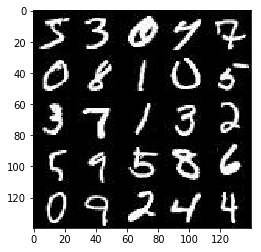

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

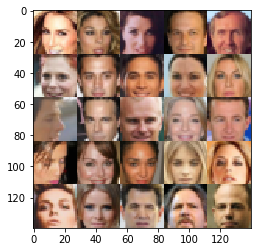

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/trimchala/miniconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return (inputs_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def leaky_relu(x, alpha): 
    return tf.maximum(alpha * x, x)

In [24]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    customer_kernel_initializer = tf.random_normal_initializer(mean = 0, stddev = 0.02)
    with tf.variable_scope('discriminator', reuse=reuse): 
        
        # Input layer : images size = 28*28*3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = customer_kernel_initializer)
        relu1 = leaky_relu(x1, alpha=alpha) # leaky ReLU
        # now 14*14*64
                
        # Conv layer with batch norm:
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer = customer_kernel_initializer)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2, alpha=alpha)
        # now 7*7*128

        # Conv layer with batch norm
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer = customer_kernel_initializer)
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = leaky_relu(bn3, alpha=alpha)
        # now 4*4*256
        
        # Conv layer with batch norm
        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    reuse = not is_train
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=reuse):
        # Reshape inputs from flat
        x1 = tf.layers.dense(z, 4*4*256)
        x1 = tf.reshape(x1, (-1, 4, 4, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = leaky_relu(x1, alpha=alpha)
        # now 4*4*256
        
        # Conv2d with transpose, batch norm, leaky ReLU
        x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = leaky_relu(x2, alpha=alpha)
        # 7*7*128

        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = leaky_relu(x3, alpha=alpha)
        # 14*14*64

        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [22]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_output = generator(input_z, out_channel_dim, alpha=alpha)
    d_output_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_output_fake, d_logits_fake = discriminator(g_output, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_output_real)*(1 - smooth))
    )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_output_fake))
    )
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_output_fake))
    )
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [23]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # all training variables
    t_vars = tf.trainable_variables()
    # discriminator variables
    d_vars = [v for v in t_vars if v.name.startswith('discriminator')]
    # generator variables
    g_vars = [v for v in t_vars if v.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()
    return samples

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [26]:
import pickle as pkl
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print_every = 10
    show_every = 100
    
    # TODO: Build Model
    all_samples, losses = [], []
    steps = 0
    
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[-1]
    
    inputs_real, inputs_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, image_channels, alpha=0.2)                
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Model
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Train
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr: learning_rate})
                
                # Print training progress
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({inputs_real:batch_images, inputs_z: batch_z, lr: learning_rate})
                    train_loss_g = g_loss.eval({inputs_z: batch_z, lr: learning_rate})
                    
                    print("Epoch {}/{}...".format(epoch_count+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                    
                # Sample generator's output
                if steps % show_every == 0:
                    gen_samples = sess.run(generator(inputs_z, image_channels, is_train=False), feed_dict={inputs_z: batch_z})
                    all_samples.append(gen_samples)
                    show_generator_output(sess, 25, inputs_z, out_channel_dim=image_channels, image_mode=data_image_mode)
                
#         saver.save(sess, './checkpoints/generator.ckpt')
    
    with open('./samples.pkl', 'wb') as f:
        pkl.dump(all_samples, f)
    with open('./losses.pkl', 'wb') as g: 
        pkl.dump(losses, g)

    return losses, all_samples            

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 4/3... Discriminator Loss: 0.6936... Generator Loss: 3.1104
Epoch 4/3... Discriminator Loss: 4.0106... Generator Loss: 0.1892
Epoch 4/3... Discriminator Loss: 0.8243... Generator Loss: 1.2032
Epoch 4/3... Discriminator Loss: 0.6624... Generator Loss: 5.5207
Epoch 4/3... Discriminator Loss: 0.7527... Generator Loss: 2.6477
Epoch 4/3... Discriminator Loss: 0.8163... Generator Loss: 2.2467
Epoch 4/3... Discriminator Loss: 2.3828... Generator Loss: 9.0467
Epoch 4/3... Discriminator Loss: 1.2068... Generator Loss: 1.0871
Epoch 4/3... Discriminator Loss: 0.7548... Generator Loss: 2.0288
Epoch 4/3... Discriminator Loss: 1.1265... Generator Loss: 2.3948


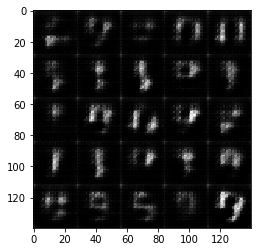

Epoch 4/3... Discriminator Loss: 0.6078... Generator Loss: 2.0559
Epoch 4/3... Discriminator Loss: 0.5783... Generator Loss: 3.0977
Epoch 4/3... Discriminator Loss: 0.6943... Generator Loss: 1.9789
Epoch 4/3... Discriminator Loss: 0.6792... Generator Loss: 1.6372
Epoch 4/3... Discriminator Loss: 1.2151... Generator Loss: 3.2078
Epoch 4/3... Discriminator Loss: 0.6612... Generator Loss: 1.9079
Epoch 4/3... Discriminator Loss: 0.8417... Generator Loss: 2.3841
Epoch 4/3... Discriminator Loss: 1.0634... Generator Loss: 0.9279
Epoch 4/3... Discriminator Loss: 0.9784... Generator Loss: 1.2649
Epoch 4/3... Discriminator Loss: 1.1170... Generator Loss: 2.6003


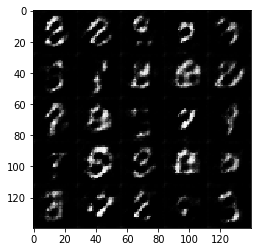

Epoch 4/3... Discriminator Loss: 1.1299... Generator Loss: 2.8509
Epoch 4/3... Discriminator Loss: 1.1823... Generator Loss: 2.5476
Epoch 4/3... Discriminator Loss: 0.9914... Generator Loss: 1.3760
Epoch 4/3... Discriminator Loss: 0.8533... Generator Loss: 1.4283
Epoch 4/3... Discriminator Loss: 1.0544... Generator Loss: 1.2212
Epoch 4/3... Discriminator Loss: 1.2045... Generator Loss: 0.7084
Epoch 4/3... Discriminator Loss: 1.4417... Generator Loss: 2.9403
Epoch 4/3... Discriminator Loss: 1.1042... Generator Loss: 1.0181
Epoch 4/3... Discriminator Loss: 1.0229... Generator Loss: 1.8636
Epoch 4/3... Discriminator Loss: 0.9737... Generator Loss: 1.2775


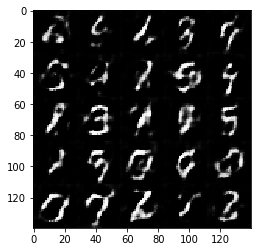

Epoch 4/3... Discriminator Loss: 0.8206... Generator Loss: 1.4995
Epoch 4/3... Discriminator Loss: 1.1126... Generator Loss: 0.7966
Epoch 4/3... Discriminator Loss: 1.0145... Generator Loss: 1.1570
Epoch 4/3... Discriminator Loss: 1.2605... Generator Loss: 0.6139
Epoch 4/3... Discriminator Loss: 0.9565... Generator Loss: 1.3655
Epoch 4/3... Discriminator Loss: 0.9688... Generator Loss: 2.0415
Epoch 4/3... Discriminator Loss: 1.2555... Generator Loss: 2.1862
Epoch 4/3... Discriminator Loss: 1.0782... Generator Loss: 0.8741
Epoch 4/3... Discriminator Loss: 1.2356... Generator Loss: 0.6845
Epoch 4/3... Discriminator Loss: 0.8807... Generator Loss: 1.7833


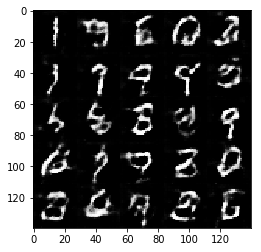

Epoch 4/3... Discriminator Loss: 1.0072... Generator Loss: 0.9895
Epoch 4/3... Discriminator Loss: 0.8887... Generator Loss: 1.1694
Epoch 4/3... Discriminator Loss: 0.9555... Generator Loss: 1.1833
Epoch 4/3... Discriminator Loss: 1.2932... Generator Loss: 0.6839
Epoch 4/3... Discriminator Loss: 1.6149... Generator Loss: 3.2110
Epoch 4/3... Discriminator Loss: 1.0233... Generator Loss: 1.2651
Epoch 4/3... Discriminator Loss: 1.0805... Generator Loss: 2.0769
Epoch 4/3... Discriminator Loss: 1.3843... Generator Loss: 0.5566
Epoch 4/3... Discriminator Loss: 0.9494... Generator Loss: 1.1363
Epoch 4/3... Discriminator Loss: 1.1203... Generator Loss: 0.8810


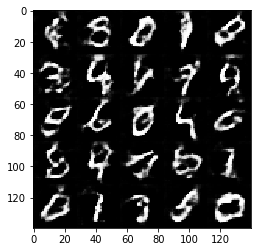

Epoch 4/3... Discriminator Loss: 1.3698... Generator Loss: 0.5632
Epoch 4/3... Discriminator Loss: 1.3418... Generator Loss: 0.6212
Epoch 4/3... Discriminator Loss: 1.5593... Generator Loss: 2.4905
Epoch 4/3... Discriminator Loss: 1.1656... Generator Loss: 1.9363
Epoch 4/3... Discriminator Loss: 0.9887... Generator Loss: 1.5496
Epoch 4/3... Discriminator Loss: 0.9820... Generator Loss: 1.9230
Epoch 4/3... Discriminator Loss: 0.9896... Generator Loss: 1.9386
Epoch 4/3... Discriminator Loss: 1.1150... Generator Loss: 0.8610
Epoch 4/3... Discriminator Loss: 1.1661... Generator Loss: 0.8479
Epoch 4/3... Discriminator Loss: 1.4809... Generator Loss: 0.4921


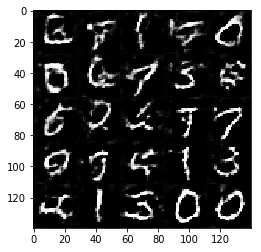

Epoch 4/3... Discriminator Loss: 1.0937... Generator Loss: 1.1284
Epoch 4/3... Discriminator Loss: 1.2474... Generator Loss: 0.6756
Epoch 4/3... Discriminator Loss: 1.3513... Generator Loss: 0.5566
Epoch 4/3... Discriminator Loss: 1.1919... Generator Loss: 1.9334
Epoch 4/3... Discriminator Loss: 0.8985... Generator Loss: 1.9705
Epoch 4/3... Discriminator Loss: 0.9967... Generator Loss: 1.1411
Epoch 4/3... Discriminator Loss: 0.9430... Generator Loss: 1.4051
Epoch 4/3... Discriminator Loss: 0.8469... Generator Loss: 1.6757
Epoch 4/3... Discriminator Loss: 1.3048... Generator Loss: 0.9894
Epoch 4/3... Discriminator Loss: 0.9464... Generator Loss: 1.1184


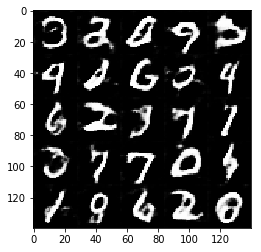

In [27]:
batch_size = 256
z_dim = 100
learning_rate = 0.001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
batch = mnist_dataset.get_batches(batch_size)
test_batch = batch.__next__()
shape = mnist_dataset.shape
image_mode = mnist_dataset.image_mode

with tf.Graph().as_default():
    losses, samples = train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

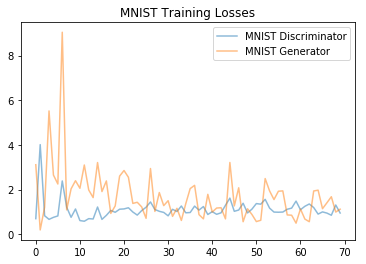

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='MNIST Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='MNIST Generator', alpha=0.5)
plt.title("MNIST Training Losses")
plt.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 2/1... Discriminator Loss: 0.5753... Generator Loss: 7.9200
Epoch 2/1... Discriminator Loss: 0.5597... Generator Loss: 5.0029
Epoch 2/1... Discriminator Loss: 0.5188... Generator Loss: 2.9438
Epoch 2/1... Discriminator Loss: 0.5835... Generator Loss: 14.2856
Epoch 2/1... Discriminator Loss: 0.5539... Generator Loss: 6.5062
Epoch 2/1... Discriminator Loss: 1.2888... Generator Loss: 12.7774
Epoch 2/1... Discriminator Loss: 1.6169... Generator Loss: 0.5203
Epoch 2/1... Discriminator Loss: 0.6908... Generator Loss: 2.2721
Epoch 2/1... Discriminator Loss: 1.0442... Generator Loss: 0.8916
Epoch 2/1... Discriminator Loss: 1.2176... Generator Loss: 3.9724


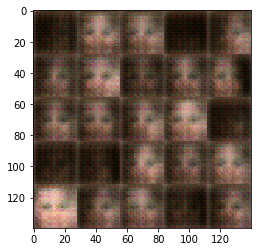

Epoch 2/1... Discriminator Loss: 0.6795... Generator Loss: 2.2781
Epoch 2/1... Discriminator Loss: 0.6597... Generator Loss: 2.0467
Epoch 2/1... Discriminator Loss: 0.7042... Generator Loss: 1.6625
Epoch 2/1... Discriminator Loss: 0.7285... Generator Loss: 1.5591
Epoch 2/1... Discriminator Loss: 1.2839... Generator Loss: 3.9142
Epoch 2/1... Discriminator Loss: 0.8564... Generator Loss: 1.6036
Epoch 2/1... Discriminator Loss: 0.9239... Generator Loss: 1.2297
Epoch 2/1... Discriminator Loss: 0.8268... Generator Loss: 1.3498
Epoch 2/1... Discriminator Loss: 0.9870... Generator Loss: 1.5697
Epoch 2/1... Discriminator Loss: 1.0100... Generator Loss: 1.5380


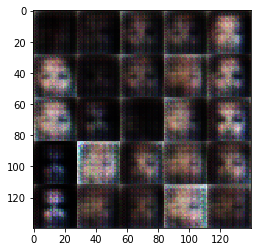

Epoch 2/1... Discriminator Loss: 0.8435... Generator Loss: 1.2894
Epoch 2/1... Discriminator Loss: 1.0247... Generator Loss: 1.0461
Epoch 2/1... Discriminator Loss: 0.9449... Generator Loss: 1.8166
Epoch 2/1... Discriminator Loss: 1.0970... Generator Loss: 0.8058
Epoch 2/1... Discriminator Loss: 0.7900... Generator Loss: 1.7798
Epoch 2/1... Discriminator Loss: 0.9888... Generator Loss: 1.1435
Epoch 2/1... Discriminator Loss: 1.1960... Generator Loss: 0.8722
Epoch 2/1... Discriminator Loss: 1.1265... Generator Loss: 1.5669
Epoch 2/1... Discriminator Loss: 1.2650... Generator Loss: 0.7387
Epoch 2/1... Discriminator Loss: 1.3380... Generator Loss: 0.6901


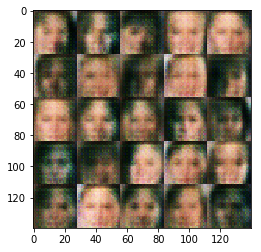

Epoch 2/1... Discriminator Loss: 0.8334... Generator Loss: 2.1965
Epoch 2/1... Discriminator Loss: 1.1324... Generator Loss: 1.3472
Epoch 2/1... Discriminator Loss: 1.9178... Generator Loss: 4.3745
Epoch 2/1... Discriminator Loss: 0.8160... Generator Loss: 1.3372
Epoch 2/1... Discriminator Loss: 2.1152... Generator Loss: 3.0556
Epoch 2/1... Discriminator Loss: 1.1257... Generator Loss: 0.8445
Epoch 2/1... Discriminator Loss: 1.1450... Generator Loss: 0.7991
Epoch 2/1... Discriminator Loss: 1.0676... Generator Loss: 1.7279
Epoch 2/1... Discriminator Loss: 0.8968... Generator Loss: 1.3821
Epoch 2/1... Discriminator Loss: 1.0546... Generator Loss: 2.7947


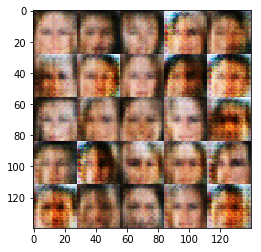

Epoch 2/1... Discriminator Loss: 1.7007... Generator Loss: 3.4845
Epoch 2/1... Discriminator Loss: 1.0158... Generator Loss: 1.6457
Epoch 2/1... Discriminator Loss: 0.9075... Generator Loss: 1.6305
Epoch 2/1... Discriminator Loss: 1.7932... Generator Loss: 3.2238
Epoch 2/1... Discriminator Loss: 0.8884... Generator Loss: 1.5684
Epoch 2/1... Discriminator Loss: 1.5544... Generator Loss: 3.4908
Epoch 2/1... Discriminator Loss: 0.8130... Generator Loss: 1.3747
Epoch 2/1... Discriminator Loss: 2.0980... Generator Loss: 4.3885
Epoch 2/1... Discriminator Loss: 0.9515... Generator Loss: 1.3327
Epoch 2/1... Discriminator Loss: 1.2309... Generator Loss: 0.6624


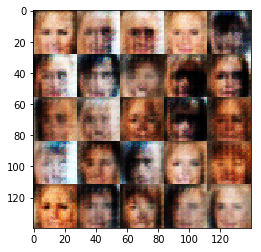

Epoch 2/1... Discriminator Loss: 1.2368... Generator Loss: 0.7634
Epoch 2/1... Discriminator Loss: 1.2006... Generator Loss: 1.2301
Epoch 2/1... Discriminator Loss: 1.0543... Generator Loss: 0.9073
Epoch 2/1... Discriminator Loss: 1.2116... Generator Loss: 1.7921
Epoch 2/1... Discriminator Loss: 1.1301... Generator Loss: 0.8343
Epoch 2/1... Discriminator Loss: 1.2592... Generator Loss: 1.6046
Epoch 2/1... Discriminator Loss: 1.3697... Generator Loss: 1.4989
Epoch 2/1... Discriminator Loss: 1.0883... Generator Loss: 1.5177
Epoch 2/1... Discriminator Loss: 1.0789... Generator Loss: 1.0466
Epoch 2/1... Discriminator Loss: 1.3577... Generator Loss: 0.5965


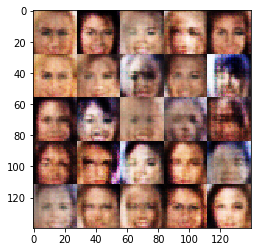

Epoch 2/1... Discriminator Loss: 1.1142... Generator Loss: 1.5683
Epoch 2/1... Discriminator Loss: 1.2215... Generator Loss: 1.2712
Epoch 2/1... Discriminator Loss: 1.2932... Generator Loss: 2.0321
Epoch 2/1... Discriminator Loss: 1.0766... Generator Loss: 1.4914
Epoch 2/1... Discriminator Loss: 1.1489... Generator Loss: 1.1530
Epoch 2/1... Discriminator Loss: 1.1412... Generator Loss: 1.1877
Epoch 2/1... Discriminator Loss: 1.1198... Generator Loss: 1.9852
Epoch 2/1... Discriminator Loss: 0.8829... Generator Loss: 1.1719
Epoch 2/1... Discriminator Loss: 1.1475... Generator Loss: 0.8841
Epoch 2/1... Discriminator Loss: 1.3676... Generator Loss: 1.6616


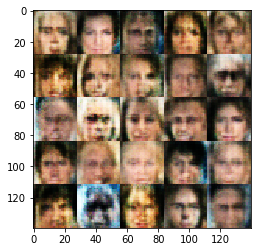

Epoch 2/1... Discriminator Loss: 1.5127... Generator Loss: 2.0245
Epoch 2/1... Discriminator Loss: 1.4081... Generator Loss: 0.5848
Epoch 2/1... Discriminator Loss: 1.5786... Generator Loss: 2.8839
Epoch 2/1... Discriminator Loss: 1.1439... Generator Loss: 1.8627
Epoch 2/1... Discriminator Loss: 1.2894... Generator Loss: 2.1036
Epoch 2/1... Discriminator Loss: 1.0713... Generator Loss: 0.9167
Epoch 2/1... Discriminator Loss: 1.0798... Generator Loss: 0.9176
Epoch 2/1... Discriminator Loss: 1.5818... Generator Loss: 0.4229
Epoch 2/1... Discriminator Loss: 1.1066... Generator Loss: 1.0303


In [29]:
batch_size = 256
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

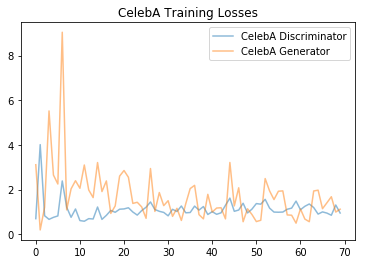

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='CelebA Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='CelebA Generator', alpha=0.5)
plt.title("CelebA Training Losses")
plt.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.